In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer  # Activer IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder


import joblib

In [17]:
# Remplace 'fichier.txt' par le chemin de ton fichier texte
df = pd.read_csv('credit.txt', delimiter='\t')  # Utilisez le bon délimiteur (par exemple ',' ou ';' si nécessaire)

df

,nodef,couple,education,revdispo,montant,age,objet,apport,prt,client,enfant,tempsplein,duree,type,interet,pel,PCS,courant
0,0,1,0,22.080,1000000.0,18,0,0.00,0,1,3,1,1,2,3.030,1,1,1
1,0,1,0,29.580,1000000.0,19,0,0.15,0,1,3,1,1,2,3.039,1,1,1
2,0,1,0,21.670,1000000.0,20,0,0.30,0,1,3,1,1,2,3.048,1,1,1
3,0,1,0,20.170,1000000.0,21,0,0.45,0,1,3,1,1,2,3.057,1,1,1
4,0,1,0,15.830,1000000.0,22,0,0.60,0,1,3,1,1,2,3.066,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,1,1,26.650,2200000.0,37,1,46.20,0,1,0,1,3,1,3.171,1,3,3
996,1,1,1,26.725,2200000.0,39,1,10.00,0,1,0,1,3,1,3.172,1,3,3
997,1,1,1,26.800,2200000.0,41,1,10.00,0,1,0,1,3,1,3.173,1,3,3
998,1,1,1,26.875,2200000.0,43,1,10.00,0,1,0,1,3,1,3.174,1,3,3


In [18]:
# Affiche les informations générales du DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nodef       1000 non-null   int64  
 1   couple      1000 non-null   int64  
 2   education   1000 non-null   int64  
 3   revdispo    1000 non-null   float64
 4   montant     1000 non-null   float64
 5   age         1000 non-null   int64  
 6   objet       1000 non-null   int64  
 7   apport      1000 non-null   float64
 8   prt         1000 non-null   int64  
 9   client      1000 non-null   int64  
 10  enfant      1000 non-null   int64  
 11  tempsplein  1000 non-null   int64  
 12  duree       1000 non-null   int64  
 13  type        1000 non-null   int64  
 14  interet     1000 non-null   float64
 15  pel         1000 non-null   int64  
 16  PCS         1000 non-null   int64  
 17  courant     1000 non-null   int64  
dtypes: float64(4), int64(14)
memory usage: 140.8 KB


### Gestion de NA (Effectué sous R)

##### Convertion du type des variables dans le bon format

##### Supression de 10% des observations 

##### Imputation des NA avec KNN

Il est important de revoir le type des variables pour ne pas avoir une imputaion erroné. Comme KNN se base sur les notion de voisinnage et prend aprés le mode ou la moyenne le type des variables est tres important.

##### Imputation des NA avec foret aléatoire

Il est important de revoir le type des variables pour ne pas avoir une imputaion erroné. Comme MissForest considère les moyenne ou médian ou mode pour la premier tour d'estimation c'est important à prendre en compte.

### Analyse univarié et bivarié

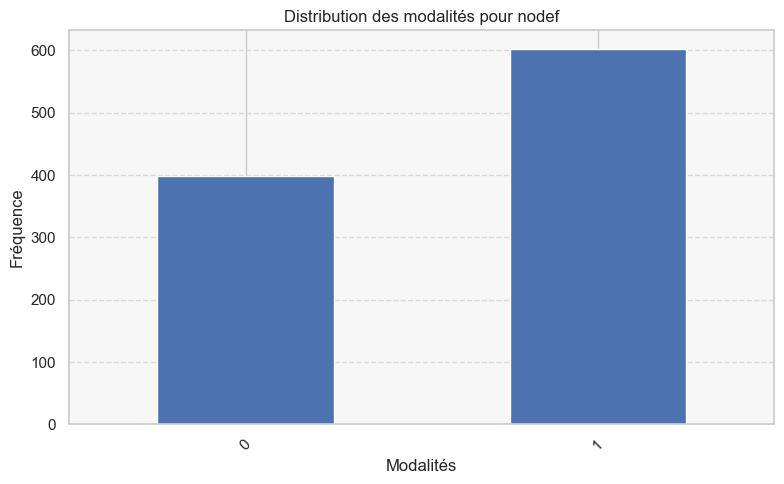

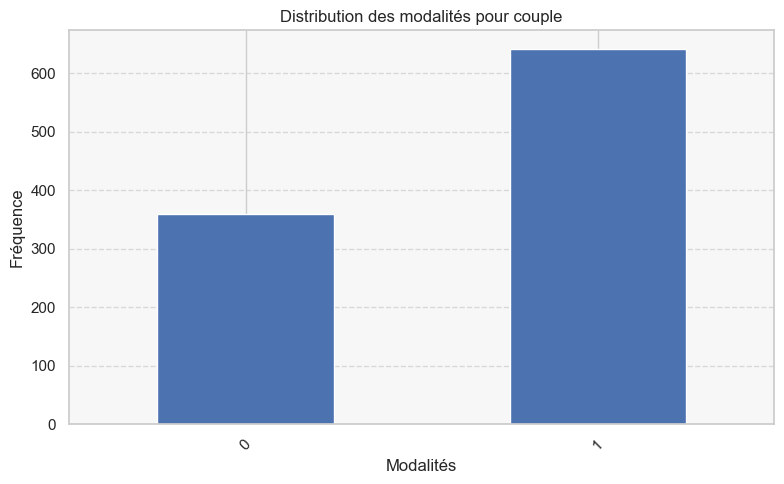

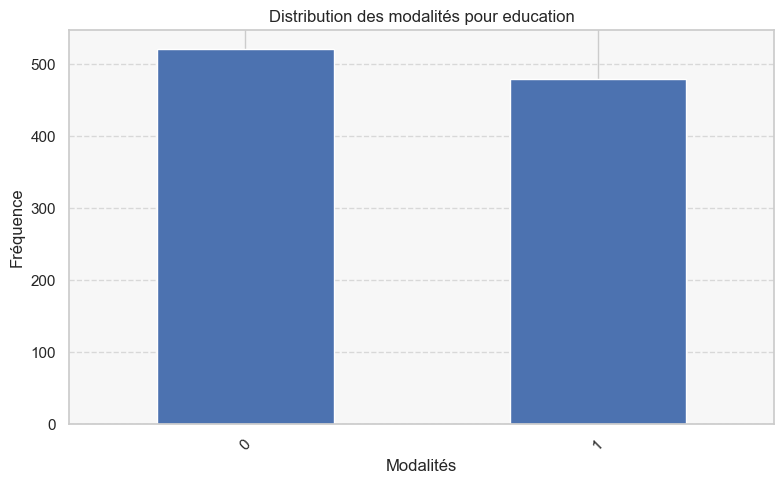

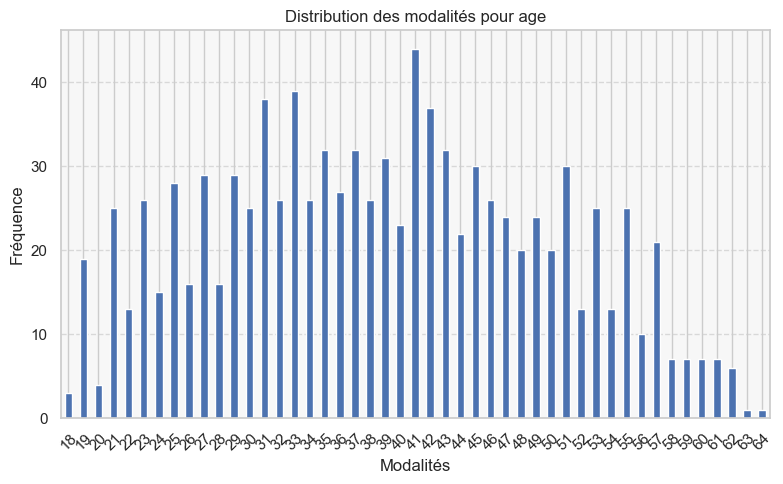

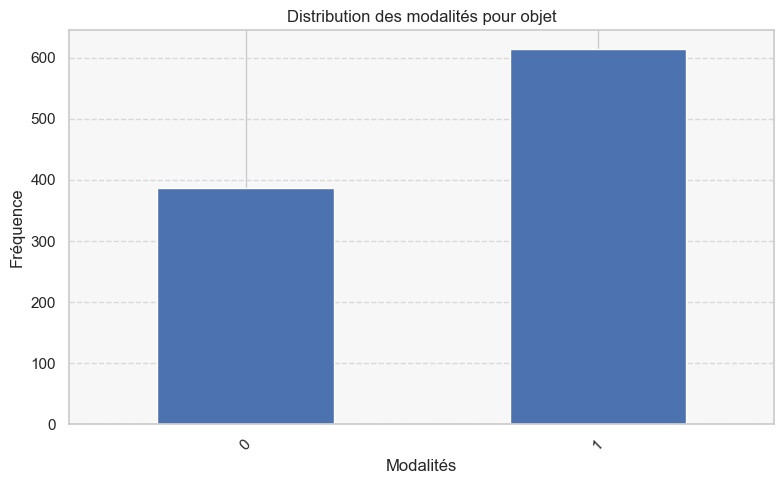

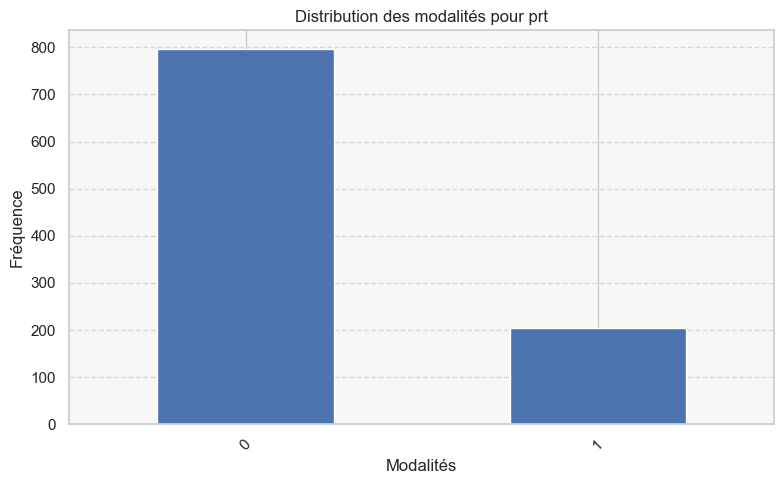

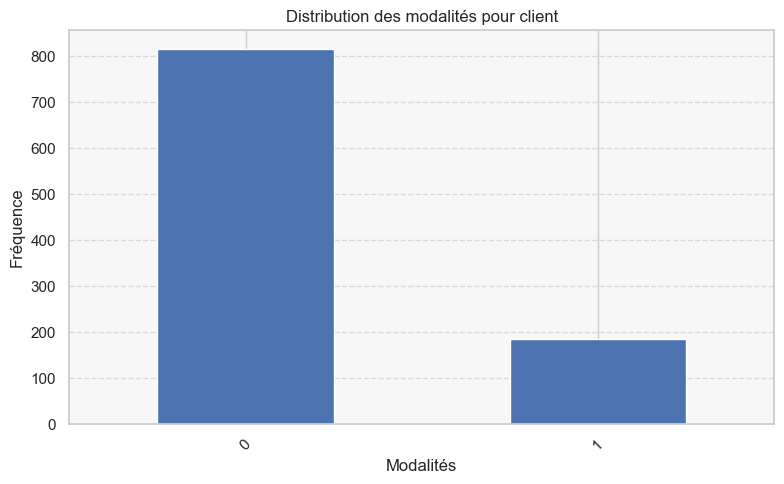

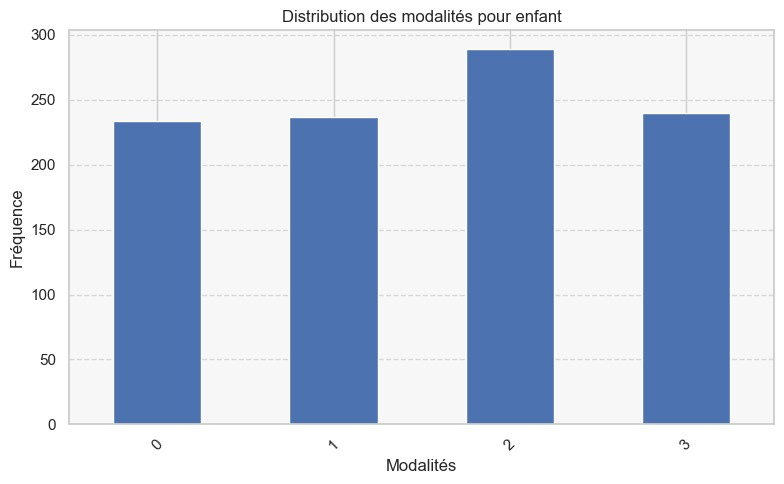

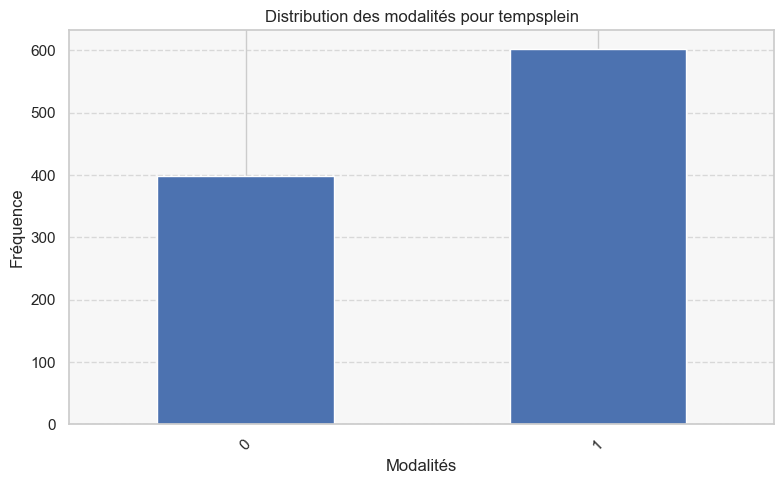

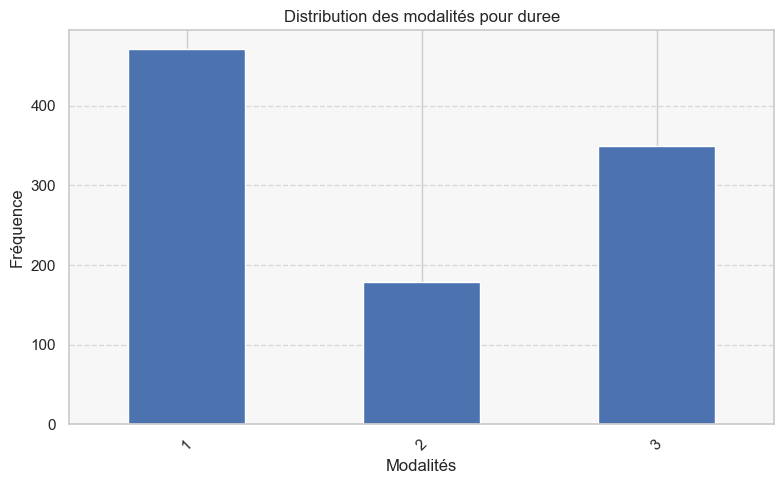

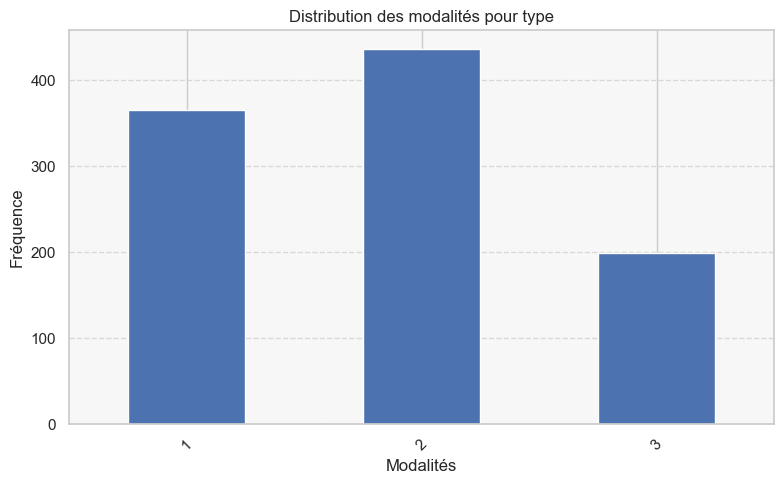

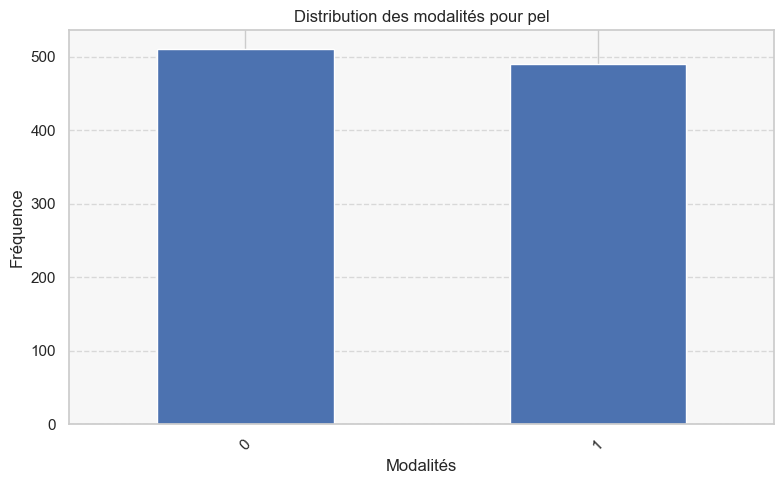

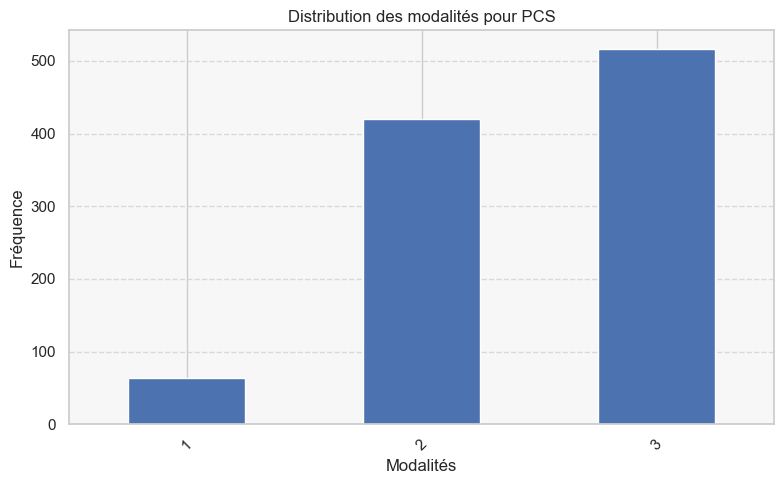

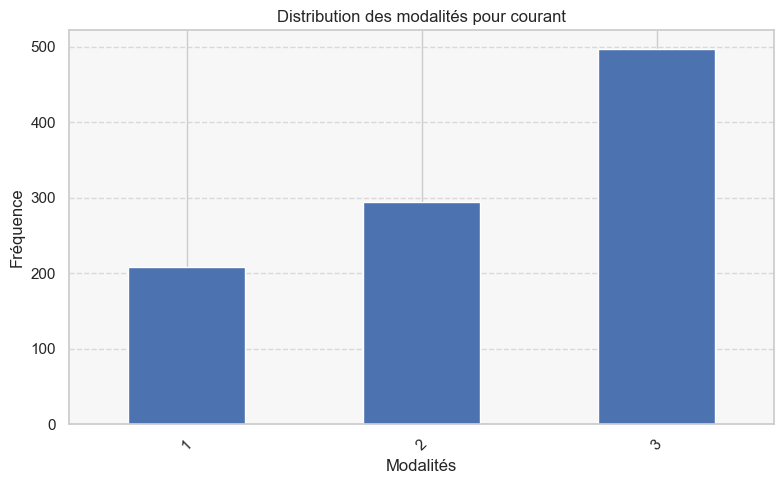

In [19]:
# Filtrer les colonnes de type int64
int_columns = df.select_dtypes(include=['int64']).columns

# Créer un diagramme en barres pour chaque colonne
for column in int_columns:
    plt.figure(figsize=(8, 5))
    df[column].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Distribution des modalités pour {column}')
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### Analyse de la distribution des varibles explicatives

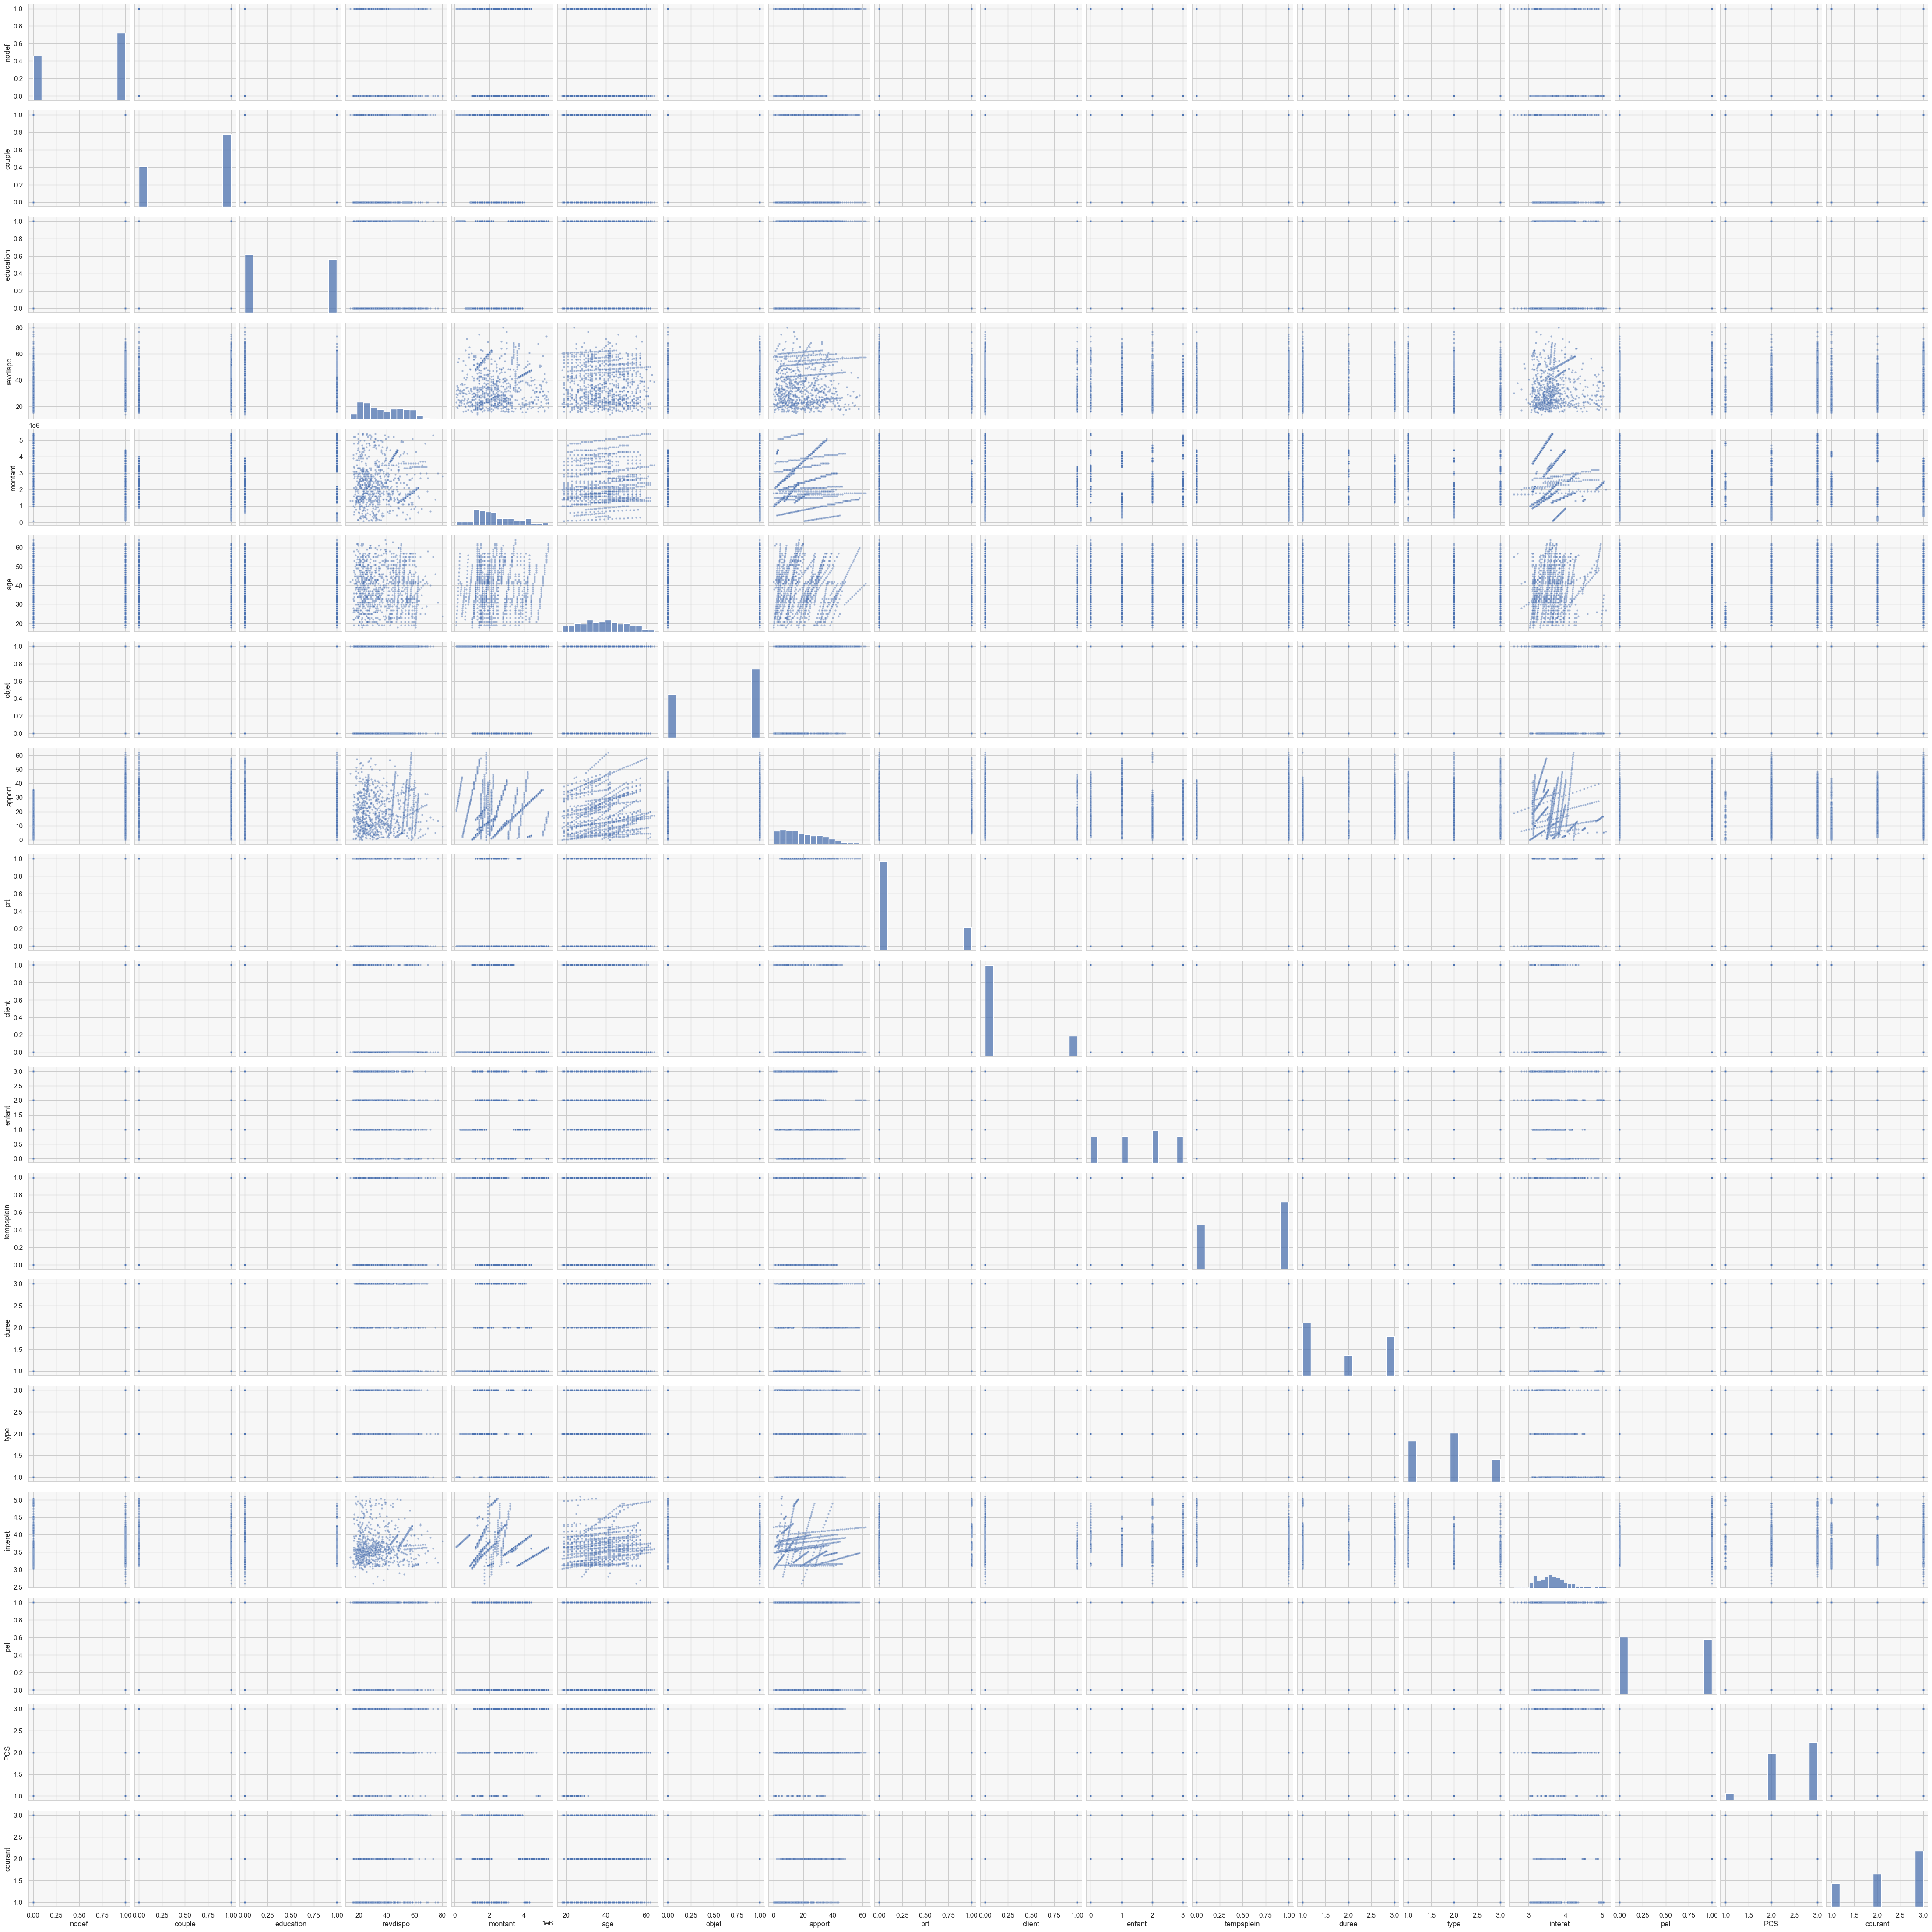

In [20]:
# Configuration du style pour la matrice de paires
sns.set(style="whitegrid", rc={'axes.facecolor': (0.97, 0.97, 0.97)})

# Création de la matrice de graphiques de dispersion (nuages de points) avec seaborn
pair_plot = sns.pairplot(df, plot_kws={'s': 10, 'alpha': 0.5})

# Affichage du plot
plt.show()

### Distribution des variables explicatives 

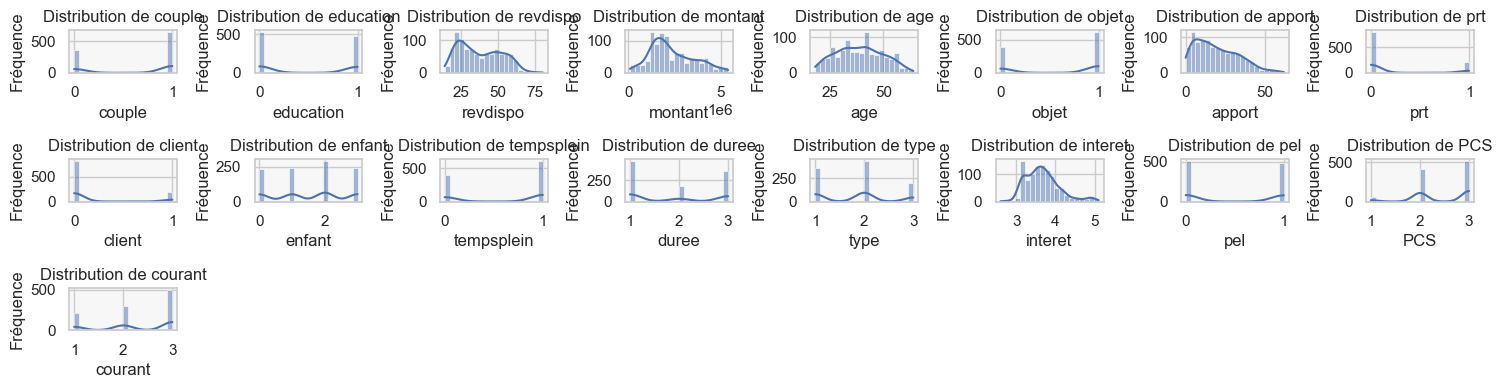

In [21]:
# Liste des variables explicatives (toutes les colonnes sauf la variable cible 'nodef')
explanatory_vars = df.drop(columns=['nodef'], errors='ignore').columns

# Taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(15, 10))

# Création d'un histogramme pour chaque variable explicative
for i, var in enumerate(explanatory_vars, 1):
    plt.subplot(8, 8, i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribution de {var}')
    plt.xlabel(var)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

### Corrélation des variables explicative avec nodef

### Identification des outliers

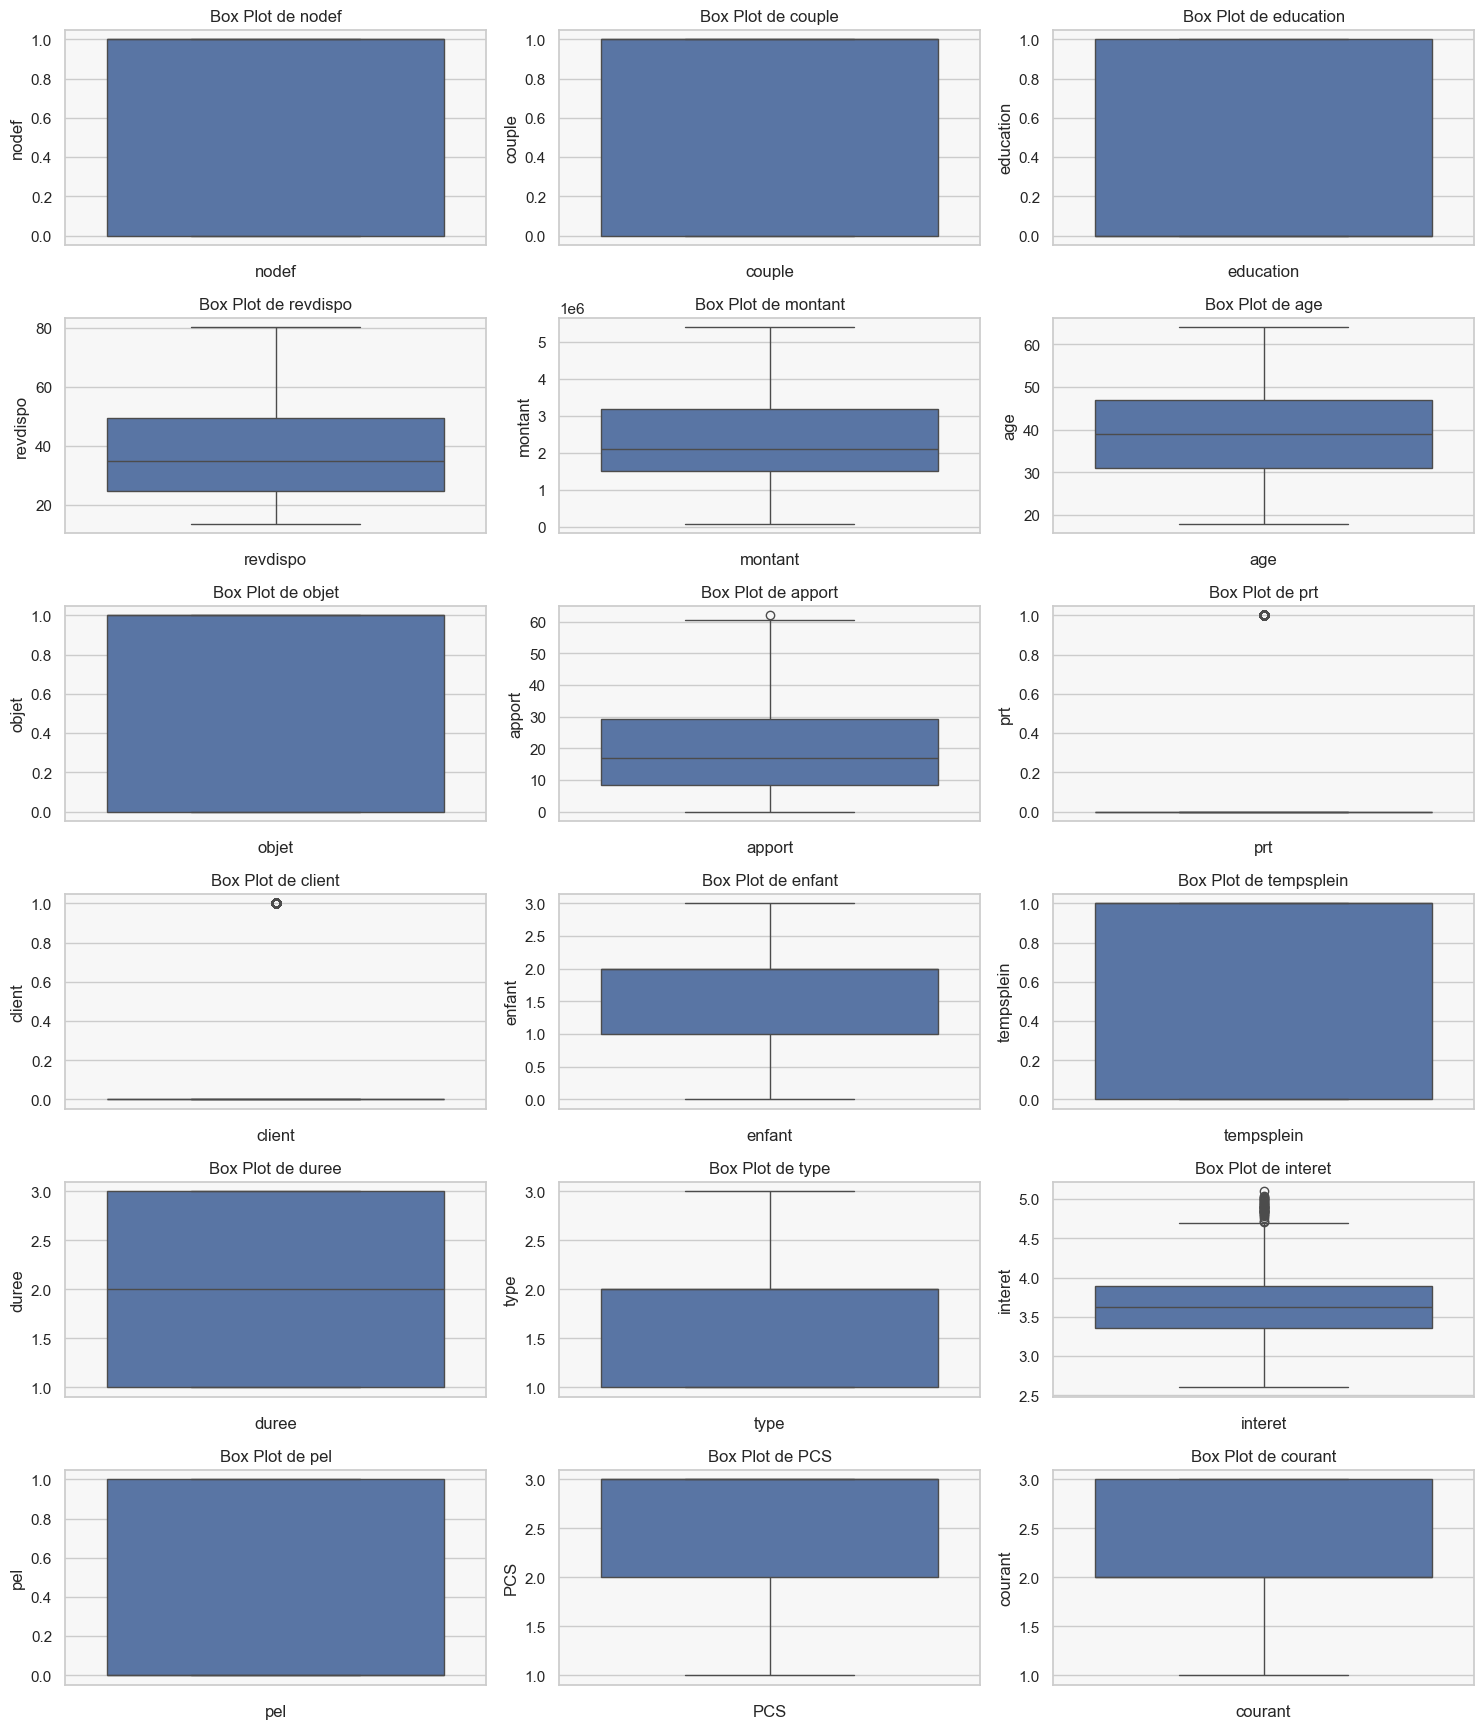

In [22]:
# Liste de toutes les variables, y compris 'nodef'
variables = df.columns

# Taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(15, 20))

# Création d'un boxplot pour chaque variable
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables) // 3 + 1, 3, i)
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

### Séparation en base de test et d'entrainement

In [23]:
# Séparation des caractéristiques (X) et de la variable cible (y)
X = df.drop(columns=['nodef'])
y = df['nodef']

# Division en ensembles d'entraînement et de test avec équilibrage de 'nodef'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Gestion du déséquilibre de nodef

C:\Users\toshiba\AppData\Local\Temp\ipykernel_31508\712096016.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modalité', y='Proportion', data=proportions, palette=['#1f77b4', '#ff7f0e'])


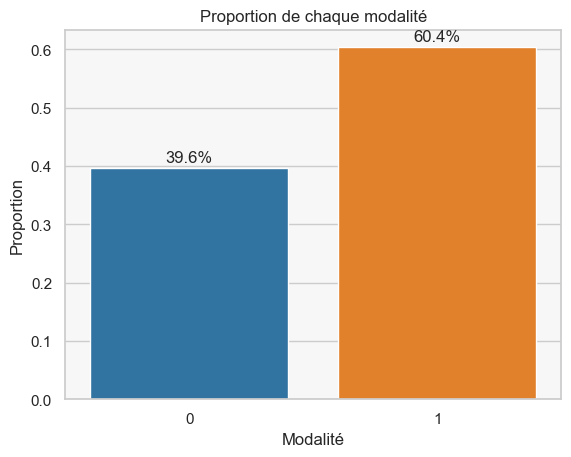

In [24]:
# Concaténation des ensembles pour obtenir des DataFrames complets
train_data = pd.concat([X_train, y_train], axis=1)

# Calculer les proportions pour chaque modalité
proportions = train_data['nodef'].value_counts(normalize=True).reset_index()
proportions.columns = ['Modalité', 'Proportion']

# Afficher le diagramme en barres avec seaborn et une palette de couleurs
sns.barplot(x='Modalité', y='Proportion', data=proportions, palette=['#1f77b4', '#ff7f0e'])
plt.title('Proportion de chaque modalité')
plt.xlabel('Modalité')
plt.ylabel('Proportion')

# Ajouter les pourcentages au-dessus de chaque barre
for index, row in proportions.iterrows():
    plt.text(row['Modalité'], row['Proportion'] + 0.01, f"{row['Proportion']*100:.1f}%", ha='center')

plt.show()

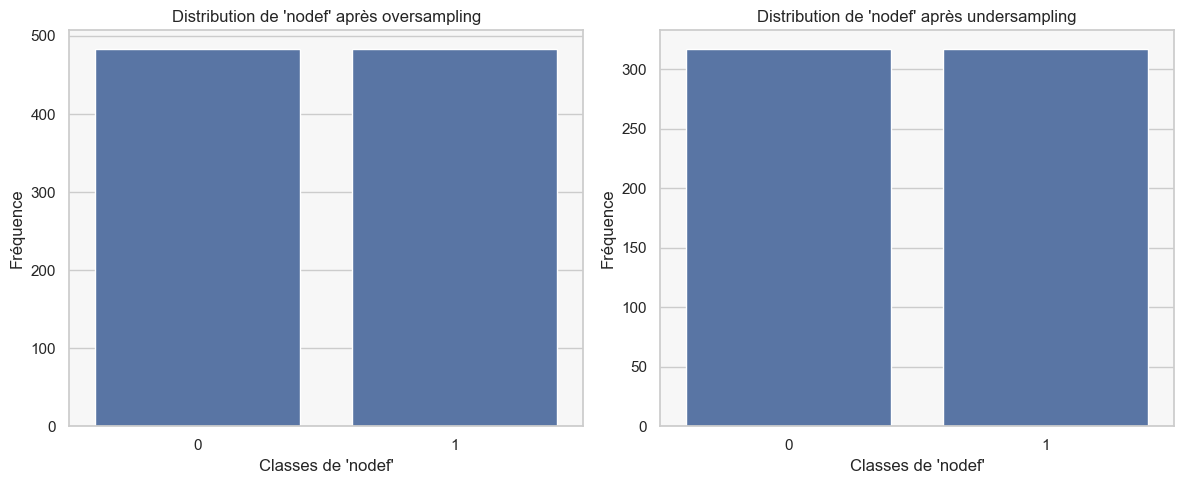

In [25]:
#Correction du déséquilibre

# Oversampling de la classe minoritaire
oversampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

# Undersampling de la classe majoritaire
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


# Création des graphiques en barres pour visualiser les distributions
plt.figure(figsize=(12, 5))

# Diagramme en barres pour l'oversampling
plt.subplot(1, 2, 1)
sns.countplot(x=y_train_over)
plt.title("Distribution de 'nodef' après oversampling")
plt.xlabel("Classes de 'nodef'")
plt.ylabel("Fréquence")

# Diagramme en barres pour l'undersampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_under)
plt.title("Distribution de 'nodef' après undersampling")
plt.xlabel("Classes de 'nodef'")
plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

### Mise en place modèle de régression logistic

c:\Users\toshiba\Desktop\M2_stat\Apprentissage\Lecture_article\apprentissage_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Performance sur Original (non équilibré):
Accuracy  : 0.95
AUC       : 0.98
Précision : 0.94
Rappel    : 0.98
Score F1  : 0.96
----------------------------------------
Performance sur Oversampling:
Accuracy  : 0.94
AUC       : 0.98
Précision : 0.94
Rappel    : 0.96
Score F1  : 0.95
----------------------------------------
Performance sur Undersampling:
Accuracy  : 0.94
AUC       : 0.98
Précision : 0.93
Rappel    : 0.97
Score F1  : 0.95
----------------------------------------


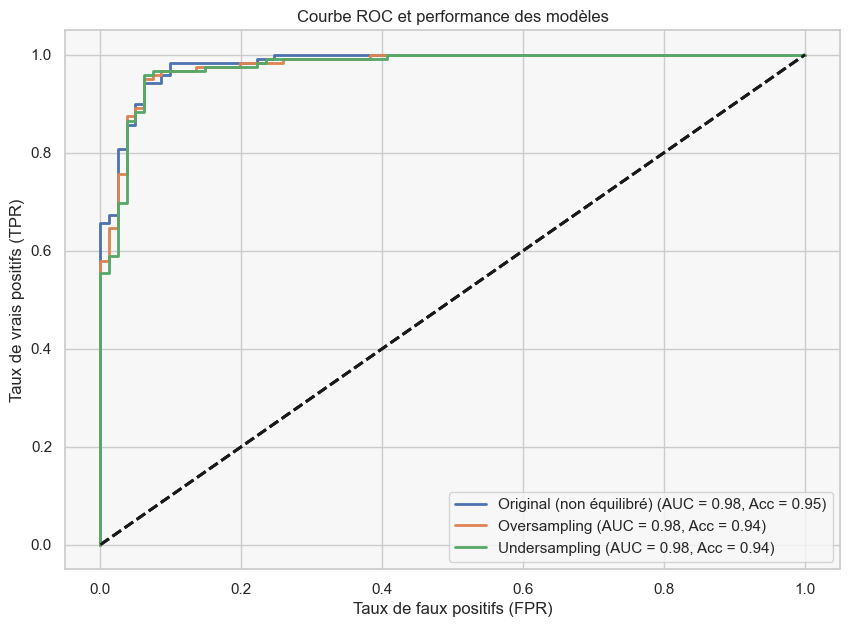

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, roc_auc_score, 
    precision_score, recall_score, f1_score
)
from sklearn.linear_model import LogisticRegression

# Initialisation du modèle de régression logistique
model_logistic = LogisticRegression(random_state=42, max_iter=1000, penalty=None)

# Fonction pour entraîner, tracer la courbe ROC et afficher les métriques
def train_plot_metrics(X_train, y_train, X_test, y_test, method_name, ax):
    # Entraînement du modèle
    model = model_logistic.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Tracé de la courbe ROC
    ax.plot(fpr, tpr, lw=2, label=f'{method_name} (AUC = {roc_auc:.2f}, Acc = {accuracy:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    # Affichage des performances dans la console
    print(f"Performance sur {method_name}:")
    print(f"Accuracy  : {accuracy:.2f}")
    print(f"AUC       : {roc_auc:.2f}")
    print(f"Précision : {precision:.2f}")
    print(f"Rappel    : {recall:.2f}")
    print(f"Score F1  : {f1:.2f}")
    print("-" * 40)

# Création d'un graphique pour les courbes ROC
fig, ax = plt.subplots(figsize=(10, 7))

# Appel de la fonction pour chaque ensemble
train_plot_metrics(X_train, y_train, X_test, y_test, "Original (non équilibré)", ax)
train_plot_metrics(X_train_over, y_train_over, X_test, y_test, "Oversampling", ax)
train_plot_metrics(X_train_under, y_train_under, X_test, y_test, "Undersampling", ax)

# Mise en forme du graphique
ax.set_title('Courbe ROC et performance des modèles')
ax.set_xlabel('Taux de faux positifs (FPR)')
ax.set_ylabel('Taux de vrais positifs (TPR)')
ax.legend(loc='lower right')
plt.grid(True)

# Option : afficher ou sauvegarder le graphique
plt.show()



### Mise en place de modèle de regression logistique régularisé

Meilleur coefficient de régularisation (C) : 0.0012738113231864786
AUC moyen par validation croisée répétée : 0.8072
Performance sur Original (non équilibré):
Accuracy  : 0.73
AUC       : 0.84
Précision : 0.73
Rappel    : 0.87
Score F1  : 0.79
----------------------------------------
Meilleur coefficient de régularisation (C) : 0.0001
AUC moyen par validation croisée répétée : 0.6511
Performance sur Oversampling:
Accuracy  : 0.41
AUC       : 0.71
Précision : 0.00
Rappel    : 0.00
Score F1  : 0.00
----------------------------------------


c:\Users\toshiba\Desktop\M2_stat\Apprentissage\Lecture_article\apprentissage_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Meilleur coefficient de régularisation (C) : 0.0001
AUC moyen par validation croisée répétée : 0.6571
Performance sur Undersampling:
Accuracy  : 0.41
AUC       : 0.71
Précision : 0.00
Rappel    : 0.00
Score F1  : 0.00
----------------------------------------


c:\Users\toshiba\Desktop\M2_stat\Apprentissage\Lecture_article\apprentissage_env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


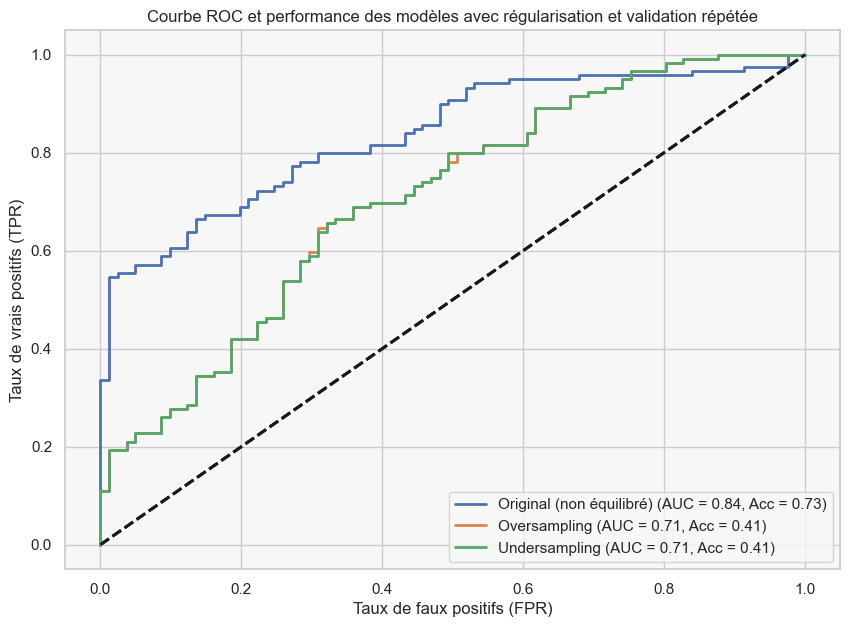

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, roc_auc_score,
    precision_score, recall_score, f1_score
)

# Fonction pour trouver le meilleur coefficient de régularisation (C) avec validation croisée répétée
def find_best_C(X_train, y_train):
    # Définition des valeurs candidates pour le paramètre de régularisation
    param_grid = {'C': np.logspace(-4, 4, 1000)}  # De 0.0001 à 10000

    # Initialisation du modèle de régression logistique
    model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')

    # Configuration de la validation croisée répétée (5 folds répétés 3 fois)
    repeated_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

    # Recherche des meilleurs hyperparamètres avec validation croisée répétée
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=repeated_kfold)
    grid_search.fit(X_train, y_train)

    # Retour du meilleur modèle et du meilleur coefficient C
    best_C = grid_search.best_params_['C']
    best_auc = grid_search.best_score_
    print(f"Meilleur coefficient de régularisation (C) : {best_C}")
    print(f"AUC moyen par validation croisée répétée : {best_auc:.4f}")

    return best_C

# Fonction pour entraîner le modèle avec la meilleure régularisation et afficher les métriques
def train_plot_metrics_with_regularization(X_train, y_train, X_test, y_test, method_name, ax):
    # Trouver le meilleur coefficient de régularisation
    best_C = find_best_C(X_train, y_train)

    # Entraînement du modèle avec le meilleur C
    model = LogisticRegression(random_state=42, C=best_C, max_iter=1000, solver='liblinear').fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Calcul des courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

    # Tracé de la courbe ROC
    ax.plot(fpr, tpr, lw=2, label=f'{method_name} (AUC = {roc_auc:.2f}, Acc = {accuracy:.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    # Affichage des performances dans la console
    print(f"Performance sur {method_name}:")
    print(f"Accuracy  : {accuracy:.2f}")
    print(f"AUC       : {roc_auc:.2f}")
    print(f"Précision : {precision:.2f}")
    print(f"Rappel    : {recall:.2f}")
    print(f"Score F1  : {f1:.2f}")
    print("-" * 40)

# Création d'un graphique pour les courbes ROC
fig, ax = plt.subplots(figsize=(10, 7))

# Appel de la fonction pour chaque ensemble
train_plot_metrics_with_regularization(X_train, y_train, X_test, y_test, "Original (non équilibré)", ax)
train_plot_metrics_with_regularization(X_train_over, y_train_over, X_test, y_test, "Oversampling", ax)
train_plot_metrics_with_regularization(X_train_under, y_train_under, X_test, y_test, "Undersampling", ax)

# Mise en forme du graphique
ax.set_title('Courbe ROC et performance des modèles avec régularisation et validation répétée')
ax.set_xlabel('Taux de faux positifs (FPR)')
ax.set_ylabel('Taux de vrais positifs (TPR)')
ax.legend(loc='lower right')
plt.grid(True)

# Option : afficher ou sauvegarder le graphique
plt.show()

Fitting 25 folds for each of 50 candidates, totalling 1250 fits

[ Original (non équilibré) ]
Meilleur coefficient de régularisation (C) : 51.79474679231202
Meilleur score AUC moyen en validation croisée : 0.7235
Performance sur le jeu de test :
Accuracy: 0.73
AUC: 0.84
Fitting 25 folds for each of 50 candidates, totalling 1250 fits

[ Oversampling ]
Meilleur coefficient de régularisation (C) : 0.0001
Meilleur score AUC moyen en validation croisée : 0.5000
Performance sur le jeu de test :
Accuracy: 0.41
AUC: 0.71
Fitting 25 folds for each of 50 candidates, totalling 1250 fits

[ Undersampling ]
Meilleur coefficient de régularisation (C) : 0.0001
Meilleur score AUC moyen en validation croisée : 0.5000
Performance sur le jeu de test :
Accuracy: 0.41
AUC: 0.71


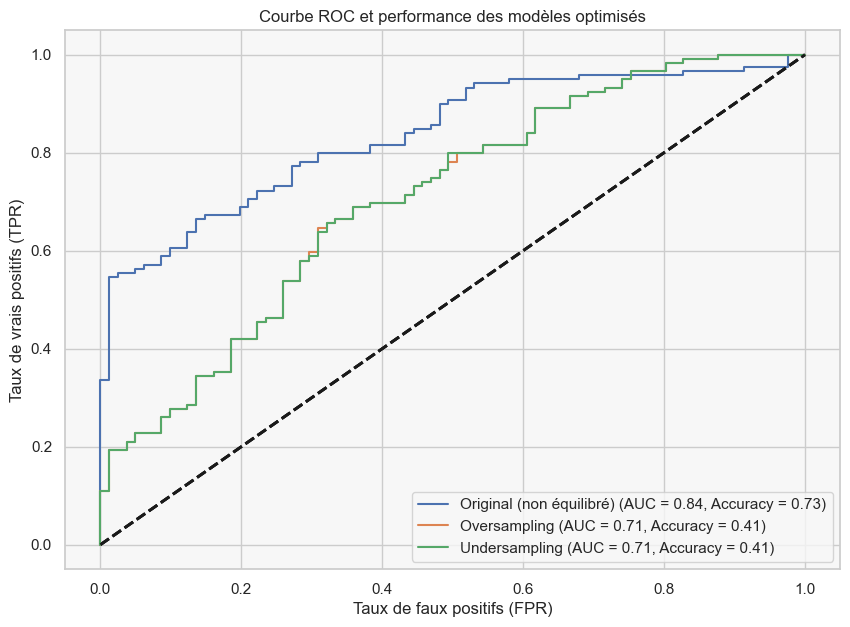

### Modèle de Forêt aléatoire


In [36]:
# Initialisation du modèle de forêt aléatoire
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)

# Fonction pour entraîner et évaluer le modèle
def train_and_evaluate(X_train, y_train, X_test, y_test, method_name):
    model = model_rf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    print(f"Performance sur {method_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC: {auc:.2f}")
    print("-" * 30)

# Évaluation sur les trois ensembles d'entraînement
train_and_evaluate(X_train, y_train, X_test, y_test, "Ensemble d'entraînement original (non équilibré)")
train_and_evaluate(X_train_over, y_train_over, X_test, y_test, "Ensemble d'entraînement avec oversampling")
train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Ensemble d'entraînement avec undersampling")

Performance sur Ensemble d'entraînement original (non équilibré):
Accuracy: 1.00
AUC: 1.00
------------------------------
Performance sur Ensemble d'entraînement avec oversampling:
Accuracy: 1.00
AUC: 1.00
------------------------------
Performance sur Ensemble d'entraînement avec undersampling:
Accuracy: 1.00
AUC: 1.00
------------------------------


In [28]:
# Initialisation et entraînement du modèle de forêt aléatoire sur l'ensemble complet
model_rf = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf.fit(X, y)

# Sérialisation du modèle entraîné
model_path = "modele_foret_aleatoire.pkl"
joblib.dump(model_rf, model_path)

print(f"Modèle de forêt aléatoire entraîné et sauvegardé sous {model_path}")

Modèle de forêt aléatoire entraîné et sauvegardé sous modele_foret_aleatoire.pkl
